# The k-Armed Bandit Problem

A bandit is a slot machine with k arms, this is a simplified setting, one that does not involve learning to act in more than one situation (a.k.a. nonassociative setting.)

The actual reward from a bandit is stochastic, the algorithm learns a model of the Expected reward, and the actual reward is random with q∗(At) as mean (expectation) and variance 1.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 10-armed bandits testbed (stationary distribution)

In [2]:
n = 2000
k = 10
models = np.random.normal(0.0, 1.0, size=(n, k))

models[0:1,:]

array([[-0.0532066 ,  1.41427784, -0.81661615, -0.03406385,  0.78645247,
         1.98473169,  2.01012816, -1.09797884, -1.69796764,  0.88614037]])

In [3]:
# the bandit returns the actual reward from the true model
def bandit(row, a):
    r = models[row, a] + np.random.normal()
    return r

### Reward-optimization method: greedy with informed exploration: Upper-confidence-bound action selection
ε-greedy action selection forces the non-greedy actions to
be tried, but indiscriminately, with no preference for those that are nearly greedy or
particularly uncertain. It would be better to select among the non-greedy actions
according to their potential for actually being optimal, taking into account both how
close their estimates are to being maximal and the uncertainties in those estimates.


In [25]:
from math import log, sqrt
# upper-confidence-bound method
def UCB(Q, N, t, c):
    a = np.argmax(Q + c * np.log(sqrt(t+1) / N))
    return a

The estimator of the action values is the averages of the observed rewards for each action.
To compute these estimators with minimum computational cost, we apply an incremental formula for updating averages with small, constant computation required to process
each new reward.

In [26]:
def update_rule(old_estimate, target, step_size):
    new_estimate = old_estimate + step_size * (target - old_estimate)
    return new_estimate

In [31]:
c = 0.5 # confidence level, smaller values mean higher confidence (larger values allow more exploration)
Qs = np.ones(shape=(n, k))
num_steps = 100
 
# ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))
# accumulators for plotting performance
rewards_accum =   np.zeros(shape=(n, num_steps))
opt_rewards_accum =   np.zeros(shape=(n, num_steps)) + 1/10**6 # avoid division by zero at step zero
    
# for each model
for i in range(n):
    # action counters
    N = np.ones(k) * 1/10**6 # avoid division by zero  in UCB computation
    
    # 1 run
    for t in range(num_steps):       
        # select action, based on estimated action-values, with upper-confidence-bound method
        a = UCB(Qs[i,:], N, t, c)
        
        # act and collect the actual reward from the bandit
        reward = bandit(i, a)

        # update our estimate of the action value 
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], reward, 1/N[a])
              
        # store the accumulators to calculate the ratio of epsilon-greedy vs optimal at each step for plotting
        if t > 0:
            rewards_accum[i, t] = rewards_accum[i, t-1] + reward
            opt_rewards_accum[i, t] = opt_rewards_accum[i, t-1] + bandit(i, np.argmax(models[i,:]))

# Compute ratio of cumulative rewards
# The stationary bandit test bed often contains commulative rewards that are close to zero
# I average over the 2000 models before computing the ratio

# mean along rows (avg of each step over all models)
avg_rewards_accum = np.mean(rewards_accum, 0)
avg_opt_rewards_accum = np.mean(opt_rewards_accum, 0)

#  average performance over all models
avg_ratio_est_vs_opt = avg_rewards_accum / avg_opt_rewards_accum

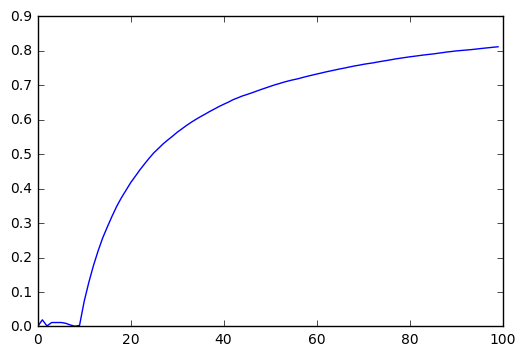

In [32]:
plt.plot(avg_ratio_est_vs_opt)

In [29]:
c = 2 # confidence level, smaller values mean higher confidence (larger values allow more exploration)
Qs = np.ones(shape=(n, k))
num_steps = 100
 
# ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))
# accumulators for plotting performance
rewards_accum =   np.zeros(shape=(n, num_steps))
opt_rewards_accum =   np.zeros(shape=(n, num_steps)) + 1/10**6 # avoid division by zero at step zero
    
# for each model
for i in range(n):
    # action counters
    N = np.ones(k) * 1/10**6 # avoid division by zero  in UCB computation
    
    # 1 run
    for t in range(num_steps):       
        # select action, based on estimated action-values, with upper-confidence-bound method
        a = UCB(Qs[i,:], N, t, c)
        
        # act and collect the actual reward from the bandit
        reward = bandit(i, a)

        # update our estimate of the action value 
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], reward, 1/N[a])
              
        # store the accumulators to calculate the ratio of epsilon-greedy vs optimal at each step for plotting
        if t > 0:
            rewards_accum[i, t] = rewards_accum[i, t-1] + reward
            opt_rewards_accum[i, t] = opt_rewards_accum[i, t-1] + bandit(i, np.argmax(models[i,:]))

# Compute ratio of cumulative rewards
# The stationary bandit test bed often contains commulative rewards that are close to zero
# I average over the 2000 models before computing the ratio

# mean along rows (avg of each step over all models)
avg_rewards_accum = np.mean(rewards_accum, 0)
avg_opt_rewards_accum = np.mean(opt_rewards_accum, 0)

#  average performance over all models
avg_ratio_est_vs_opt = avg_rewards_accum / avg_opt_rewards_accum

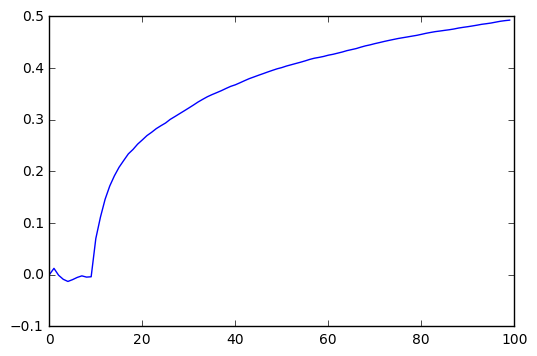

In [30]:
plt.plot(avg_ratio_est_vs_opt)